## Experimento 3

#### Ubicación
* **Latitud:** 7.1386079 N
* **Longitud:** 73.1230923 O
* **Descripción:** La prueba se realizo en el barrio comuneros, en el edificio Loft 9, apt 411. Unicamente se uso la estación *outdoor* ubicada cerca a la venta, como se puede ver en la imagen.

<center><img src="img.jpeg" width=20%></center>

#### Objetivo
Explorar el comportamiento de las mediciones en función de los estados de la ventana *abierto*, *cerrado*, lo que equivandría a si hay o no un flujo de aire. 

#### Concideraciones
Las mediciones se verán afectas por las actividades desarrolladas en la casa durante esos días, cocinar, hacer aseo, colgar ropa cerca a la estación, cerrar la cortina... lo ideal sería poder identificar cuando se cerro o abrio la ventana apartir de las mediciones.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime
import numpy
import itertools

#importa configuracion
import os,sys
sys.path.append("../")
from common import config, get_medicion

#importa un modulo para visualizar de forma rapida 
sys.path.insert(0,'../../../')
import VisualizacionRapida as Vr

In [2]:
config_ = config(os.getcwd().replace("\\",'/'))
start = config_['date_init']
end = config_['date_end']

print(type(end))
indoor =pd.read_csv("../../../indoor3-5.csv")
outdoor =pd.read_csv("../../../outdoor3-5.csv")
indoor['fecha_hora_med'] = pd.to_datetime(indoor['fecha_hora_med'])
outdoor['fecha_hora_med'] = pd.to_datetime(outdoor['fecha_hora_med'])
indoor.index = indoor['fecha_hora_med']
indoor.resample('1Min', closed='right').mean()

outdoor.index = outdoor['fecha_hora_med']
outdoor.resample('1Min', closed='right').mean()

indoor = indoor.loc[start: end]
outdoor = outdoor.loc[start: end]
print(end)

<class 'datetime.datetime'>
2020-11-25 08:50:00+00:00


..\common.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  __config = yaml.load(f)


#### Visualización de los datos correspondientes a CO2

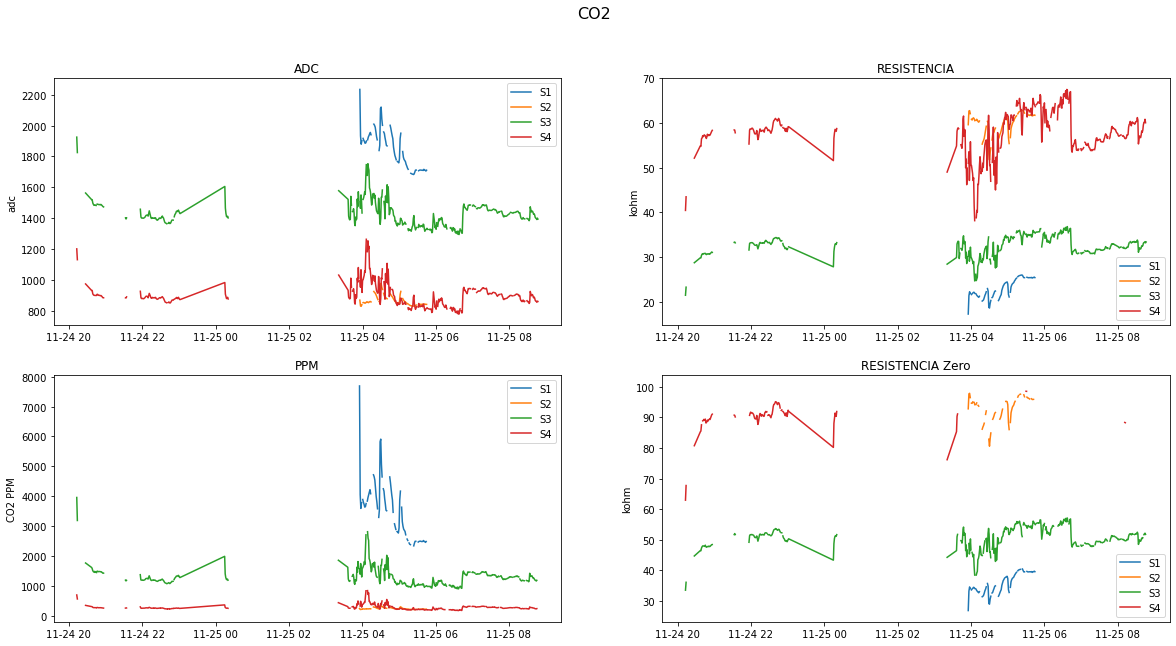

In [3]:
Vr.VisualizacionCO2(indoor,outdoor,n=0)

#### Visualización de los datos correspondientes a Material Particulado

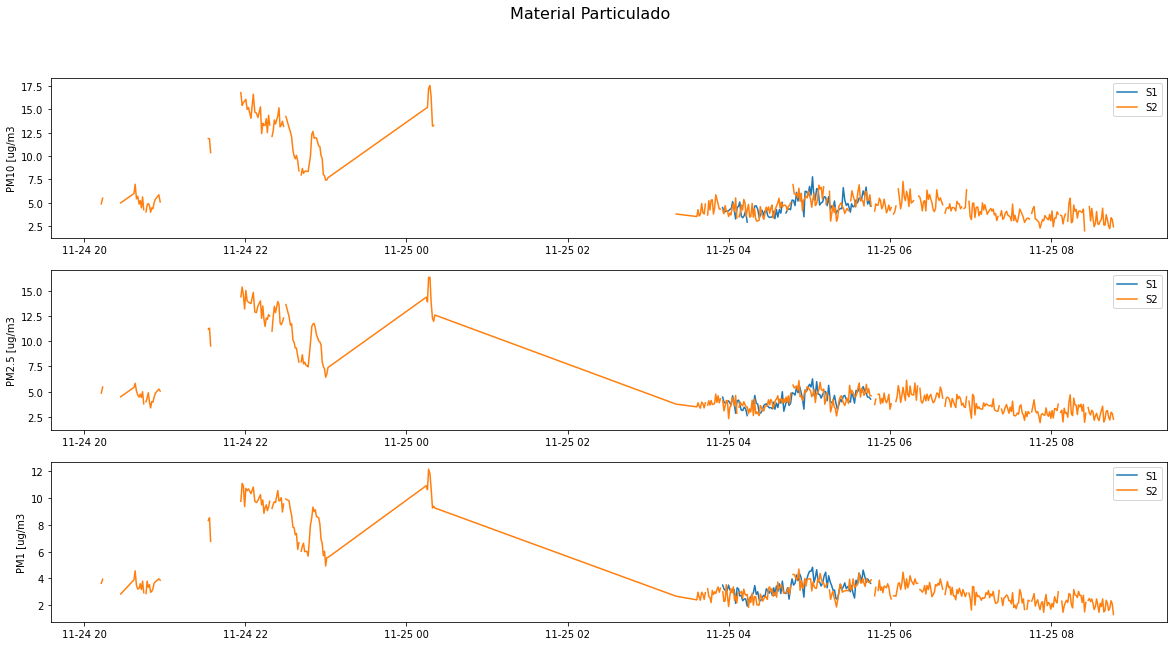

In [4]:
Vr.VisualizacionMP(indoor,outdoor)

Las estaciones no tomaron datos de forma continua antes de **11-25 04**

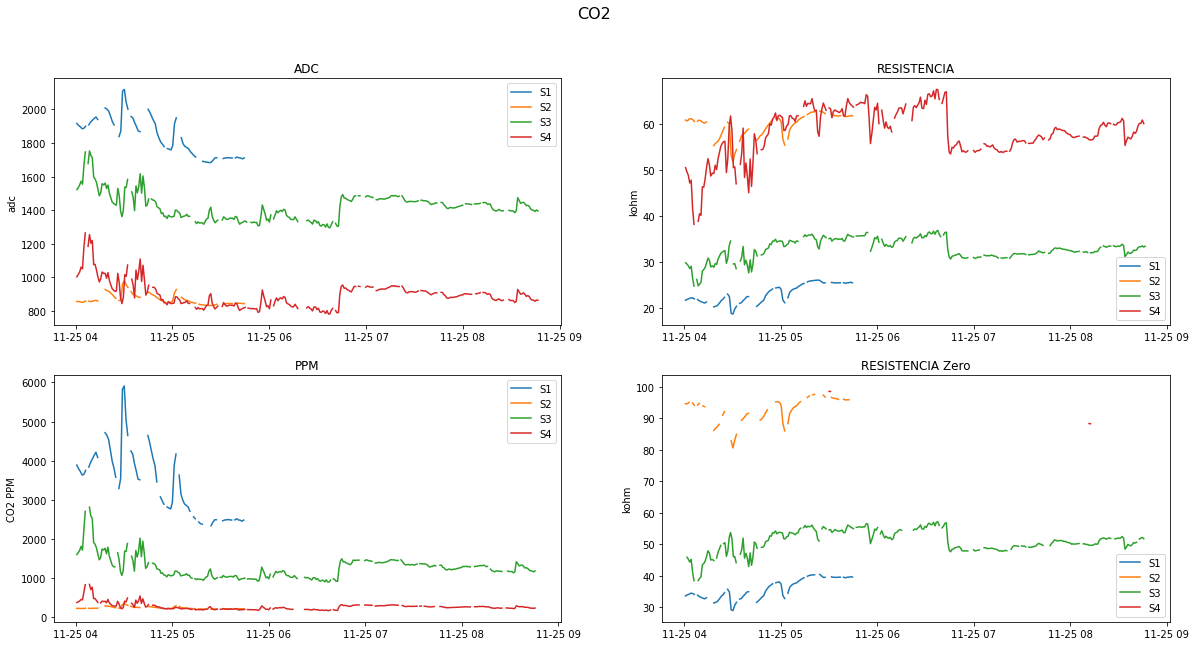

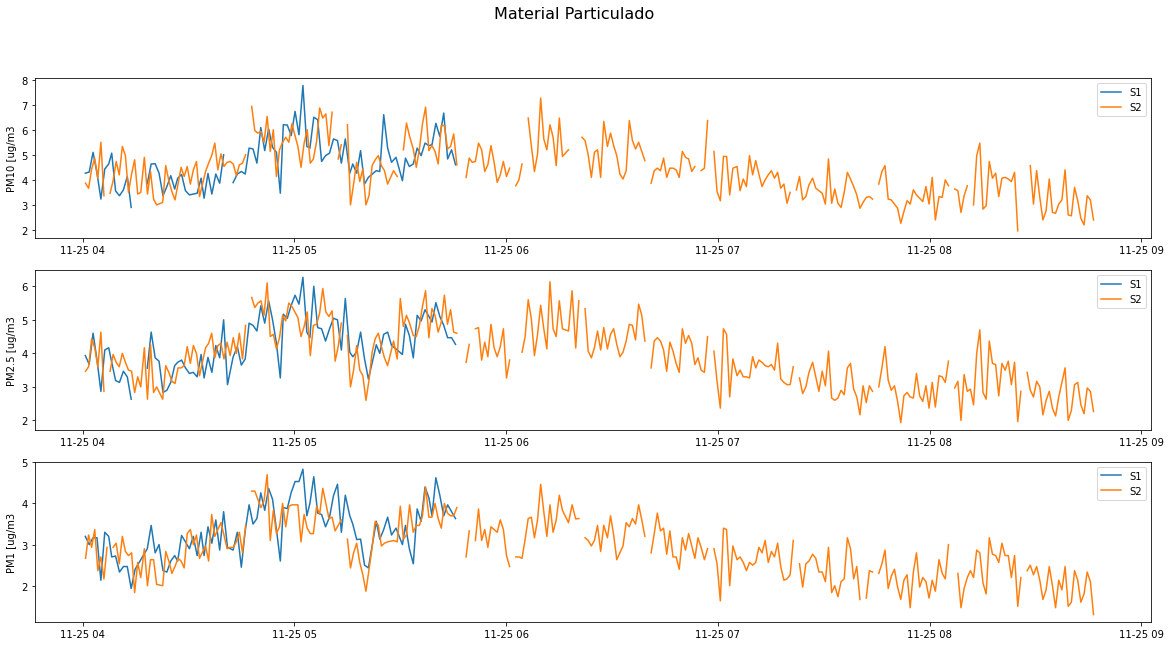

In [5]:
corte = config_['date_validos']
outdoor = outdoor[corte:]
indoor = indoor[corte:]
Vr.VisualizacionCO2(indoor,outdoor,n=0)
Vr.VisualizacionMP(indoor,outdoor,n=0)

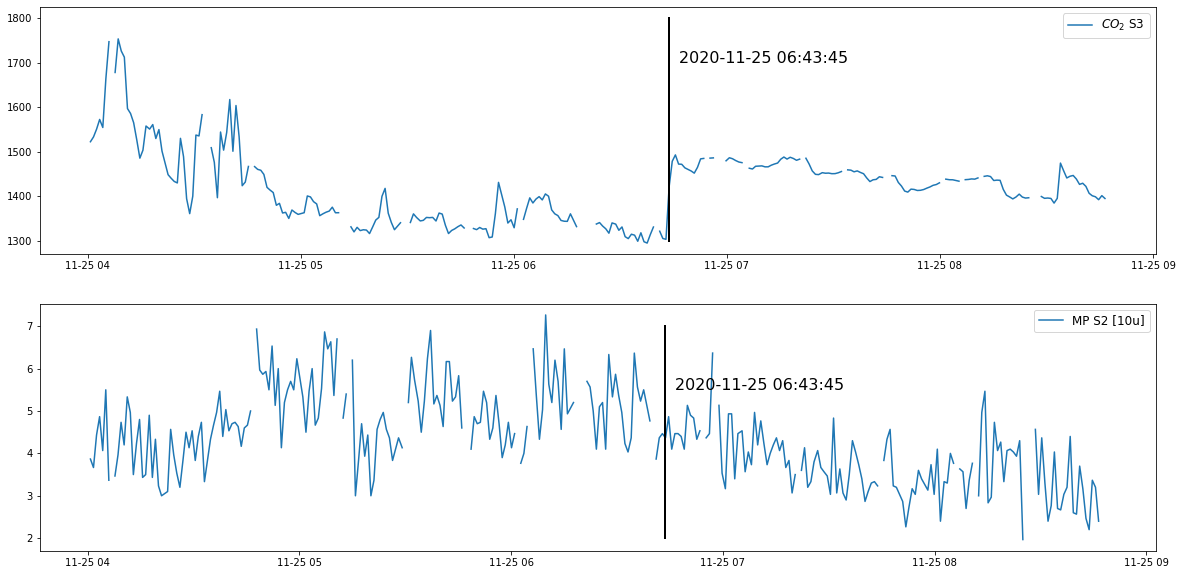

In [6]:
fig, axs = plt.subplots(2)
fig.set_size_inches(20,10)

axs[0].plot(outdoor['co2_adc_1'], label = r'$CO_2$ S3')
axs[0].legend(fontsize = 12)
axs[0].plot([outdoor.index[179] for i in range(1300,1800)] ,[i for i in range(1300,1800)],color = 'k',lw=2)
axs[0].annotate('2020-11-25 06:43:45 ',xy = (outdoor.index[182] ,1700),fontsize = 16) 


axs[1].plot(outdoor['pm10_0_au'], label = 'MP S2 [10u]')
#axs[1].plot(outdoor['pm2_5_au'], label = 'MP S2 [2.5u]')
#axs[1].plot(outdoor['pm1_0_au'], label = 'MP S2 [1u]')
axs[1].plot([outdoor.index[179] for i in range(2,8)] ,[i for i in range(2,8)],color ='k',lw =2)
axs[1].annotate('2020-11-25 06:43:45 ',xy = (outdoor.index[182] ,5.5),fontsize = 16) 
axs[1].legend(fontsize = 12)


#### Conclusiones y sugerencias
* El muestro de las estaciones no es continuo.
* En $CO_2$ se evidencian cambios marcados cuando se abrio o cerro la ventan, mientras que en el material particulado no se evidencia ninguna variación significativa.
* El comportamiento de todos los sensores de $CO_2$ es simular, con el desfase propio de que aun no han sido calibrados.
* No se evidencia alguna comportamiento particular en función del tamaño del material particulado.